# Exercise 3 — Linear Prediction

Importing libraries for the project

In [138]:
import numpy as np
import soundfile as sr
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz
from scipy.signal import freqz
from scipy.signal import lfilter

Importing sound file

In [139]:
# 1)
speech1 = sr.read('resources/speech1.wav')

In [140]:
speech1[0].shape

(45466,)

In [141]:
print(f'The sampling rate of speech1 is: {speech1[1]}Hz')

The sampling rate of speech1 is: 16000Hz


In [142]:
sample_rate = speech1[1]

num_samples1 = speech1[0].shape[0]
speech1_data = speech1[0]

x1 = np.linspace(0, num_samples1, num=num_samples1, dtype=np.int32)

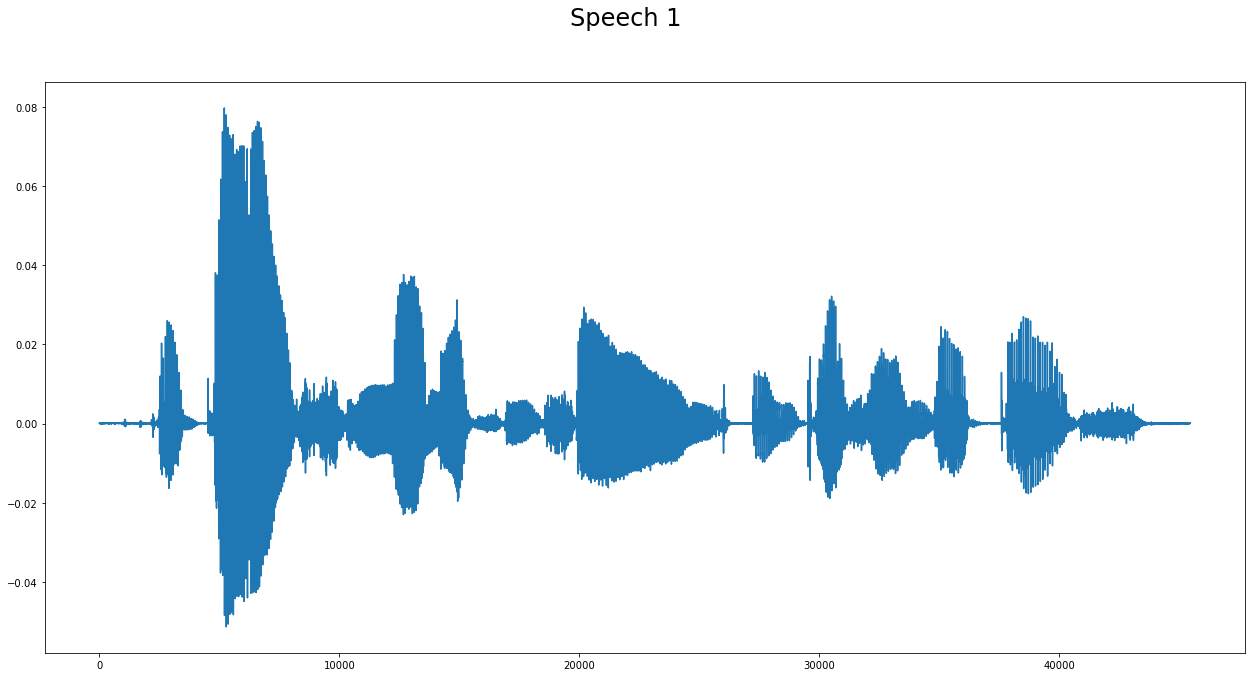

In [143]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.suptitle("Speech 1", fontsize=24)
plt.plot(x1, speech1_data)

In [144]:
# 2)
frame_length = 32
frame_shift = 8
millis_per_sample = 1000 / sample_rate
frame_length_samples = int(frame_length / millis_per_sample)
frame_length_samples

512

In [145]:
#fig = plt.gcf()
#fig.set_size_inches(21.5, 10.5)
#x1_voiced = x1[5200:6200]
#plt.suptitle("Speech1 voiced segment", fontsize=24)
#plt.plot(x1_voiced, speech1_data[5200:6200])

In [146]:
speech1_data_voiced = speech1_data[5200:5200+frame_length_samples]

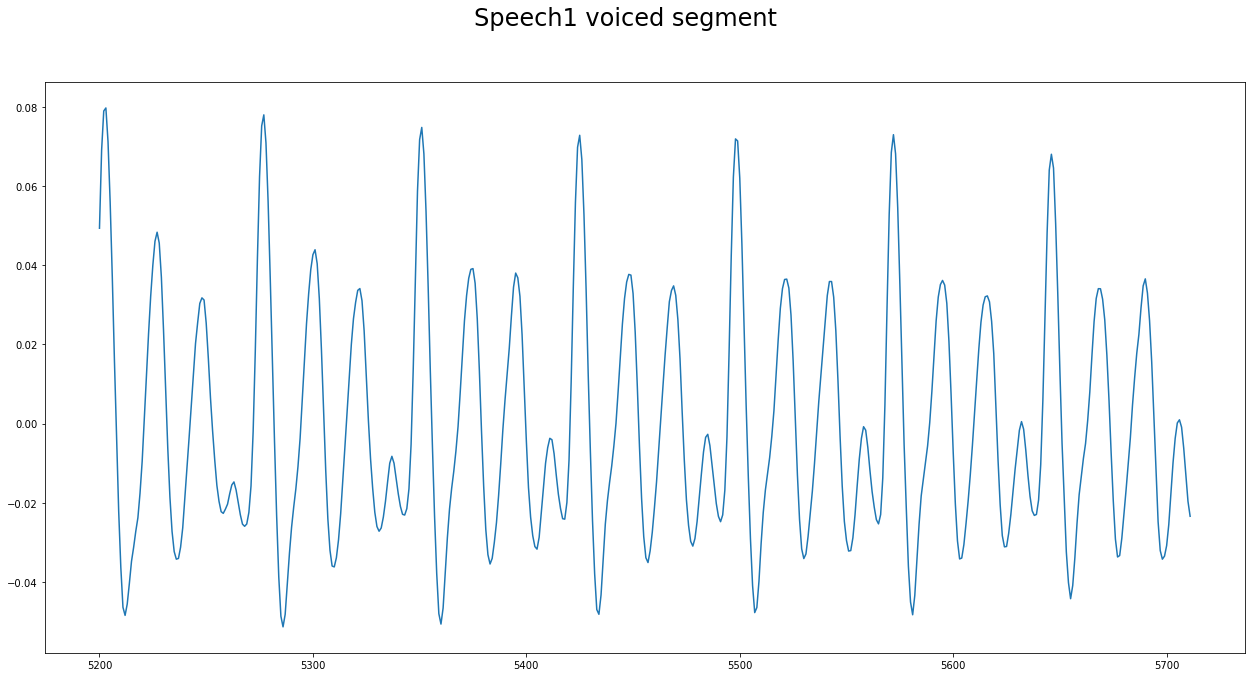

In [147]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
x1_voiced = x1[5200:5200+frame_length_samples]
plt.suptitle("Speech1 voiced segment", fontsize=24)
plt.plot(x1_voiced, speech1_data_voiced)

In [148]:
#fig = plt.gcf()
#fig.set_size_inches(21.5, 10.5)
#x1_unvoiced = x1[19000:20500]
#plt.suptitle("Speech1 unvoiced segment", fontsize=24)
#plt.plot(x1_unvoiced, speech1_data[19000:20500])

In [149]:
speech1_data_unvoiced = speech1_data[19000:19000+frame_length_samples]

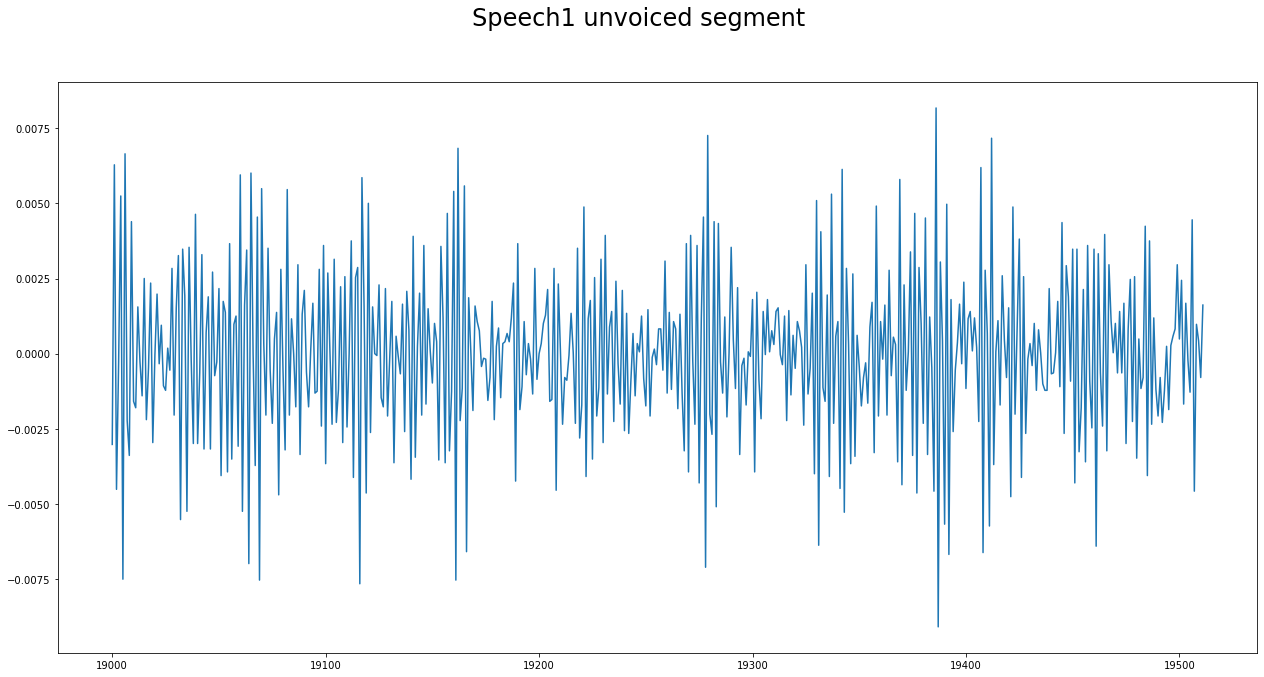

In [150]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
x1_unvoiced = x1[19000:19000+frame_length_samples]
plt.suptitle("Speech1 unvoiced segment", fontsize=24)
plt.plot(x1_unvoiced, speech1_data_unvoiced)

In [151]:
# Compute the Hann window
analysis_window = np.hanning(frame_length_samples)

x1_voiced_hann = speech1_data_voiced * analysis_window
x1_unvoiced_hann = speech1_data_unvoiced * analysis_window

In [152]:
# 3)
autocorr_voiced = np.correlate(x1_voiced_hann, x1_voiced_hann, mode='full')
autocorr_voiced = autocorr_voiced[len(x1_voiced_hann)-1:len(x1_voiced_hann)+12]
autocorr_voiced[:-1].shape

(12,)

In [153]:
autocorr_voiced[:-1]

array([ 0.16339037,  0.15488374,  0.13070076,  0.09441359,  0.05100232,
        0.00584784, -0.03606549, -0.07073933, -0.09554265, -0.10933553,
       -0.11242082, -0.10627113])

In [154]:
autocorr_voiced[1:]

array([ 0.15488374,  0.13070076,  0.09441359,  0.05100232,  0.00584784,
       -0.03606549, -0.07073933, -0.09554265, -0.10933553, -0.11242082,
       -0.10627113, -0.0931884 ])

In [155]:
autocorr_voiced[1:].shape

(12,)

In [156]:
coefficients_voiced = solve_toeplitz((-1)*autocorr_voiced[:-1], autocorr_voiced[1:])
coefficients_voiced

array([-2.7598751 ,  2.74747825, -0.46944529, -1.35498685,  1.15932916,
        0.12301464, -0.89318144,  0.79663012, -0.4759765 ,  0.45430685,
       -0.44946775,  0.20929401])

In [157]:
autocorr_unvoiced = np.correlate(x1_unvoiced_hann, x1_unvoiced_hann, mode='full')
autocorr_unvoiced = autocorr_unvoiced[len(x1_unvoiced_hann)-1:len(x1_unvoiced_hann)+12]
autocorr_unvoiced[:-1].shape

(12,)

In [158]:
coefficients_unvoiced = solve_toeplitz((-1)*autocorr_unvoiced[:-1], autocorr_unvoiced[1:])
coefficients_unvoiced

array([ 0.8087156 ,  0.09680771, -0.37976429,  0.1309839 ,  0.13072863,
        0.07850801, -0.09542772, -0.01394769,  0.1512481 ,  0.24945309,
        0.110447  ,  0.01624608])

In [159]:
# 4.a)
frequency_response_voiced = freqz(b = 1, a = np.concatenate(([1], coefficients_voiced)), worN=frame_length_samples, whole=True, fs=sample_rate)

In [160]:
frequency_response_voiced[0].shape

(512,)

In [161]:
frequency_response_unvoiced = freqz(b = 1, a = np.concatenate(([1], coefficients_unvoiced)), worN=frame_length_samples, whole=True, fs=sample_rate) 

In [162]:
frequency_response_unvoiced[0].shape

(512,)

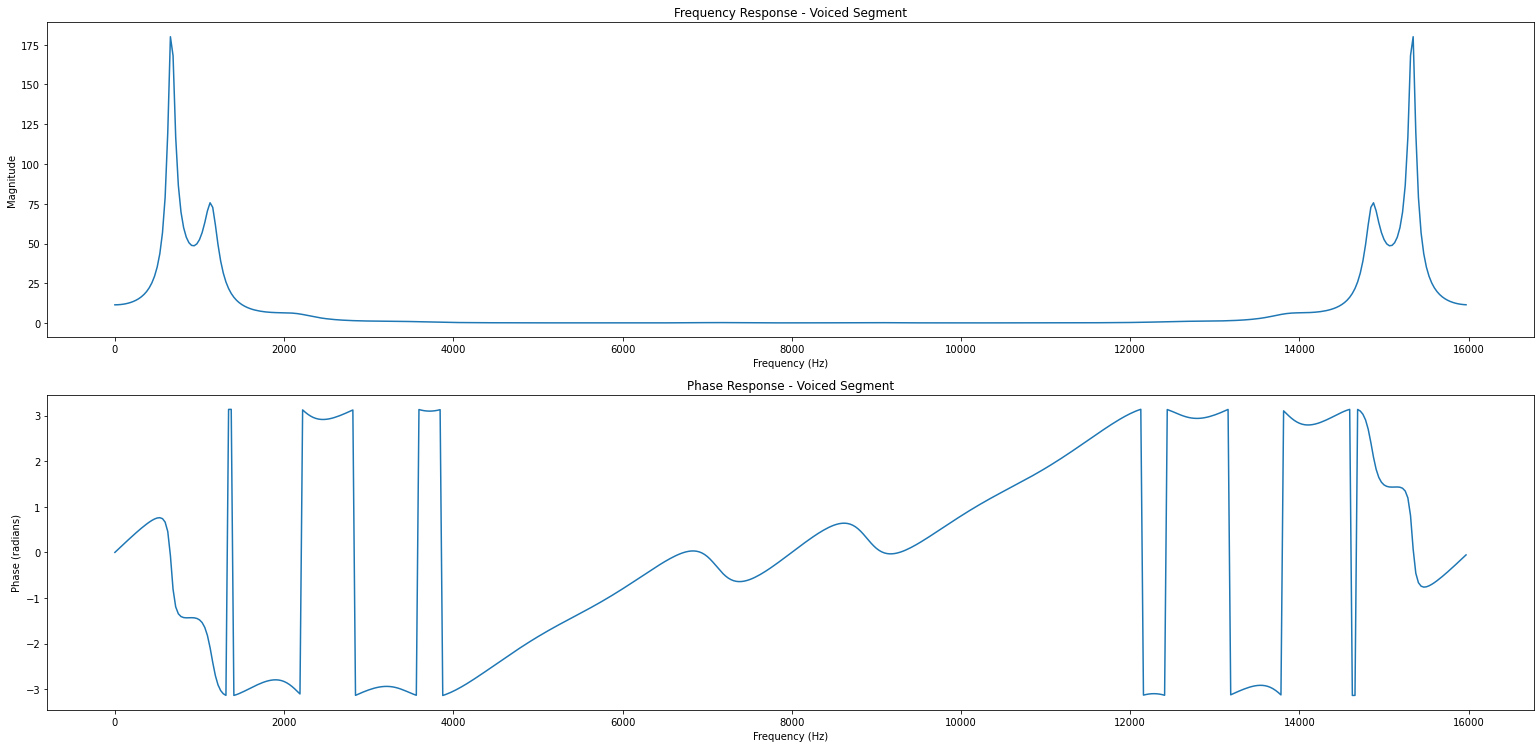

In [163]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.subplot(2, 1, 1)
plt.plot(frequency_response_voiced[0], np.abs(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response - Voiced Segment')

plt.subplot(2, 1, 2)
plt.plot(frequency_response_voiced[0], np.angle(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response - Voiced Segment')

plt.tight_layout()
plt.show()

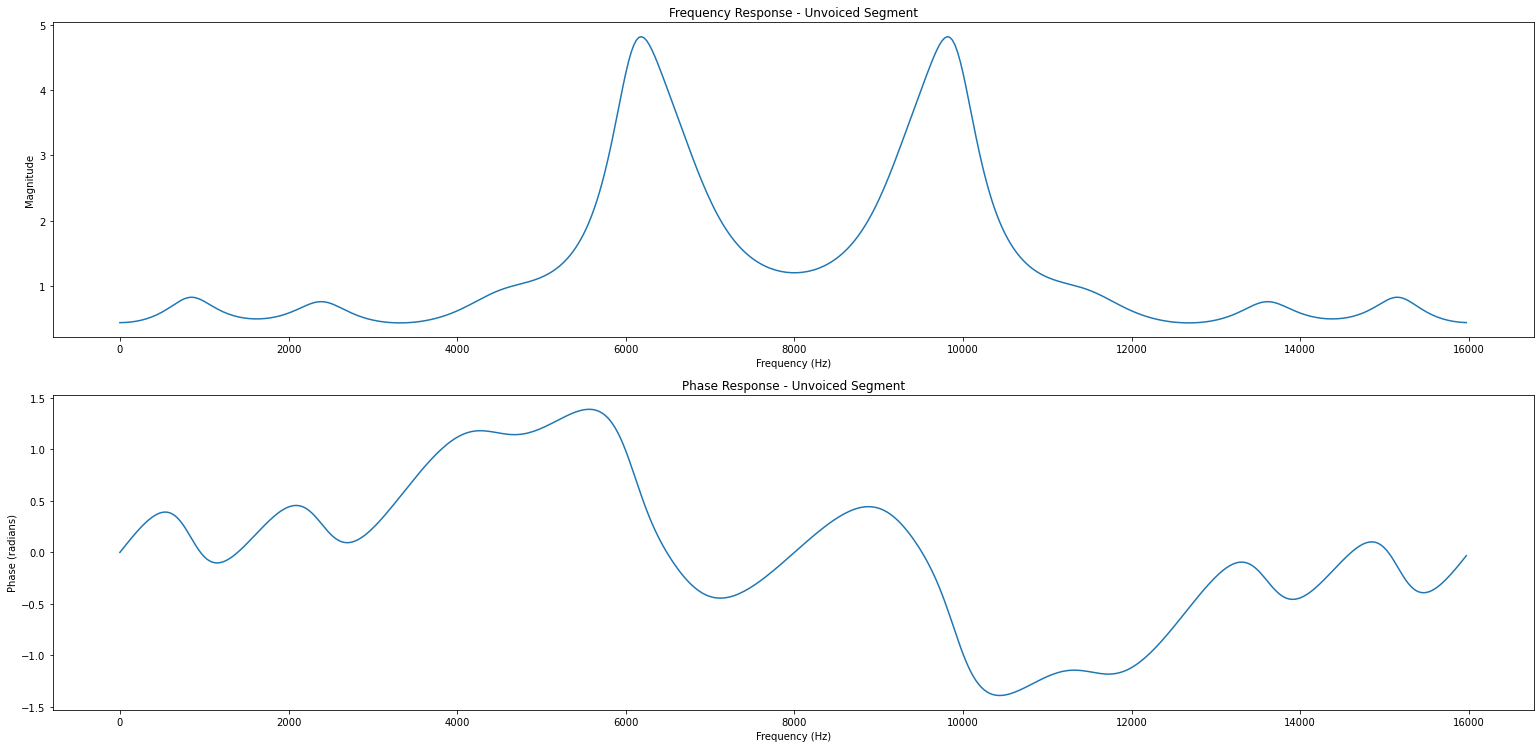

In [164]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.subplot(2, 1, 1)
plt.plot(frequency_response_unvoiced[0], np.abs(frequency_response_unvoiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response - Unvoiced Segment')

plt.subplot(2, 1, 2)
plt.plot(frequency_response_unvoiced[0], np.angle(frequency_response_unvoiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response - Unvoiced Segment')

plt.tight_layout()
plt.show()

 4.b) Because the vocal tract model is an all pole filter, and the denominator is the sum of 1 plus a polynomial with the LPC coefficients.

In [165]:
# 5)
fft_voiced = np.fft.rfft(x1_voiced_hann)
fft_unvoiced = np.fft.rfft(x1_unvoiced_hann)

fft_voiced.shape


(257,)

In [166]:
fft_unvoiced.shape

(257,)

In [ ]:
fft_voiced_dB = 10 * np.log10(np.abs(fft_voiced)+ 10**(-15))
filter_mag_dB = 10 * np.log10(np.abs(frequency_response_voiced[1]) + 10**(-15))
freq_axis = np.linspace(0, sample_rate / 2, fft_voiced.shape[0])

In [ ]:
frequency_response_voiced[0].shape

In [ ]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(freq_axis, fft_voiced_dB, label='Windowed Segments Amplitude (dB)', c='r')
plt.plot(freq_axis, filter_mag_dB[:257], label='Filter Amplitude (dB)', c='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Amplitude Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [170]:
fft_unvoiced_dB = 10 * np.log10(np.abs(fft_unvoiced)+ 10**(-15))
filter_mag_dB_unvoiced = 10 * np.log10(np.abs(frequency_response_unvoiced[1]) + 10**(-15))
freq_axis_unvoiced = np.linspace(0, sample_rate / 2, fft_unvoiced.shape[0])

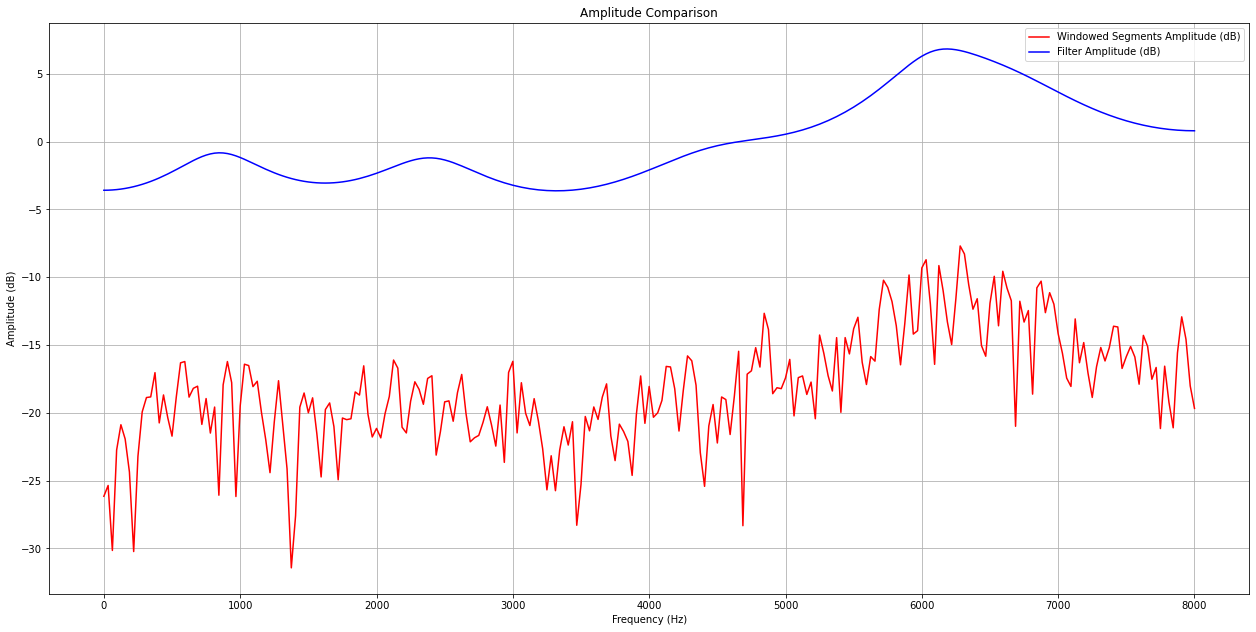

In [171]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(freq_axis_unvoiced, fft_unvoiced_dB, label='Windowed Segments Amplitude (dB)', c='r')
plt.plot(freq_axis_unvoiced, filter_mag_dB_unvoiced[:257], label='Filter Amplitude (dB)', c='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Amplitude Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# 6.a)
e_voiced = lfilter(np.concatenate(([1], coefficients_voiced)), 1, speech1_data_voiced)
e_voiced.shape

(512,)

In [173]:
e_unvoiced = lfilter(np.concatenate(([1], coefficients_unvoiced)), 1, speech1_data_unvoiced)
e_unvoiced.shape

(512,)

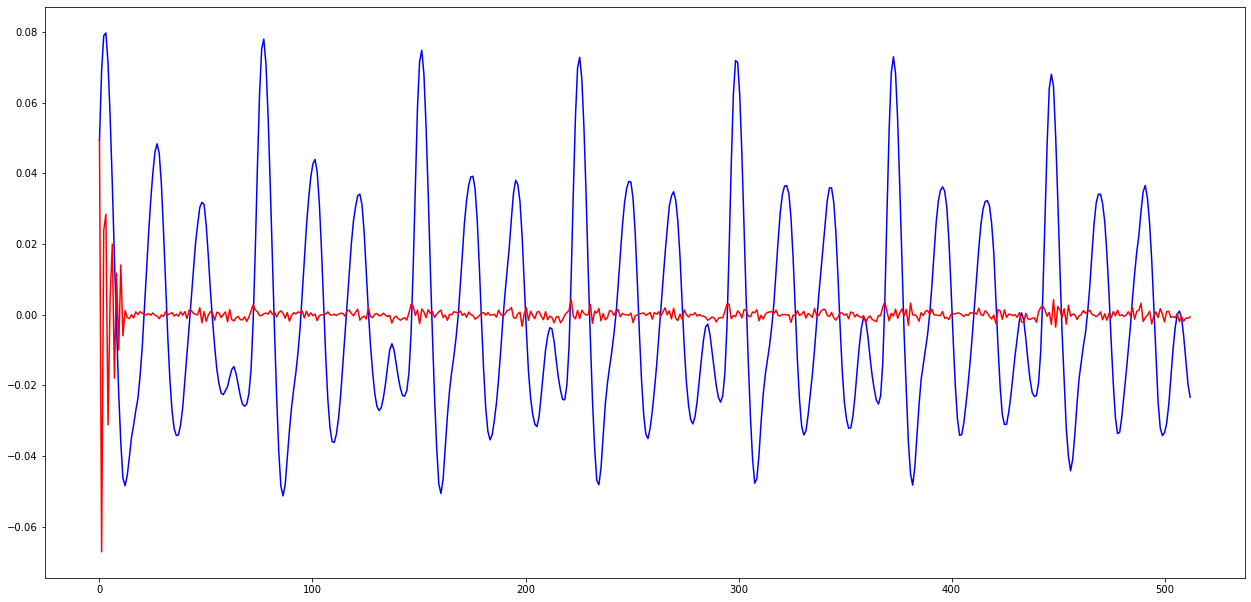

In [174]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.linspace(0,len(speech1_data_voiced),len(speech1_data_voiced)),speech1_data_voiced, c='b')
plt.plot(np.linspace(0, len(e_voiced), len(e_voiced)), e_voiced, c='r')
plt.show()

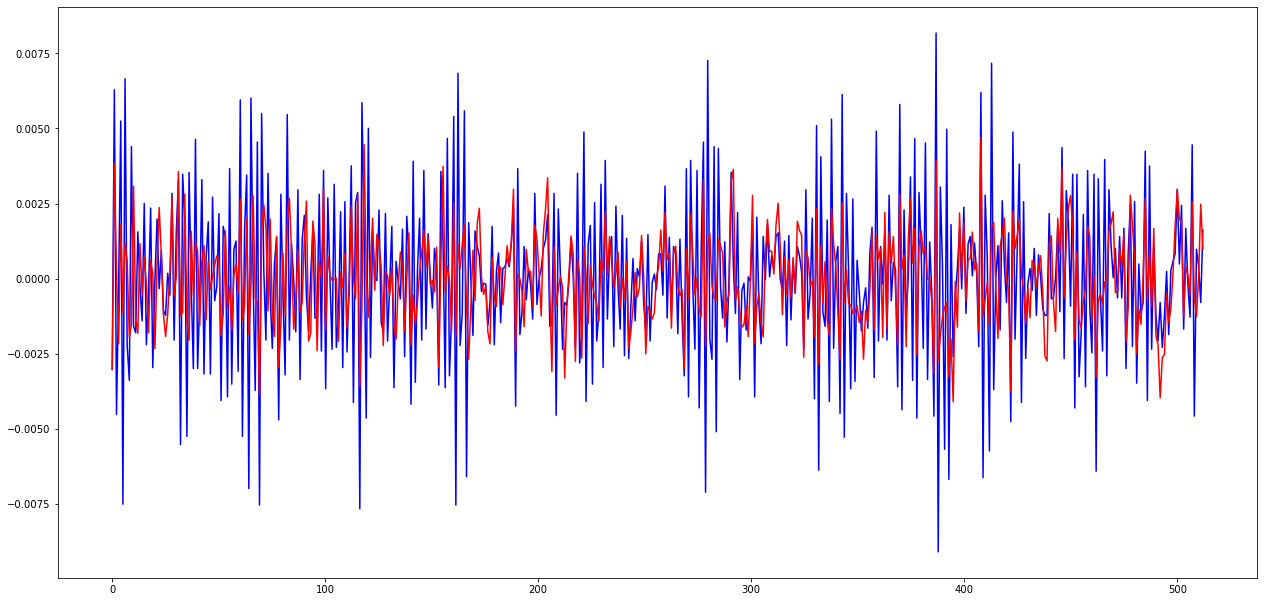

In [175]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.linspace(0,len(speech1_data_unvoiced),len(speech1_data_unvoiced)),speech1_data_unvoiced, c='b')
plt.plot(np.linspace(0, len(e_unvoiced), len(e_unvoiced)), e_unvoiced, c='r')
plt.show()

6.b) The difference between the voiced and unvoiced signals' residuals is that in the voiced segment the residual starts with a high amplitude and then it decreases. On the other hand, for the unvoiced segment the residual keeps a high amplitude during the whole segment and don't fall close to zero.

Note: check answer

6.c) The expression scipy.signal.lfilter(np.concatenate(([1], a)), 1, s) yields the residual signal because the filter design includes a feedback path that captures and outputs of the unfiltered components of the input signal.

Note: check answer

7.a) Scaling: The amplitudes of H and S may have different scaling factors applied. For example, if the magnitudes of H and S are expressed in different units or if different normalization techniques are used, the resulting amplitudes can vary.

In [193]:
#7.b) Note: ask how to use the residual to adjust H
energy_e_voiced = sum(abs(e_voiced)**2)
energy_e_unvoiced = sum(abs(e_unvoiced)**2)
frequency_response_voiced_adjusted = frequency_response_voiced[1] - energy_e_voiced
frequency_response_unvoiced_adjusted = frequency_response_unvoiced[1] - energy_e_voiced

filter_mag_dB_adjusted = 10 * np.log10(np.abs(frequency_response_voiced_adjusted) + 10**(-15))
filter_mag_dB_unvoiced_adjusted = 10 * np.log10(np.abs(frequency_response_unvoiced_adjusted) + 10**(-15))

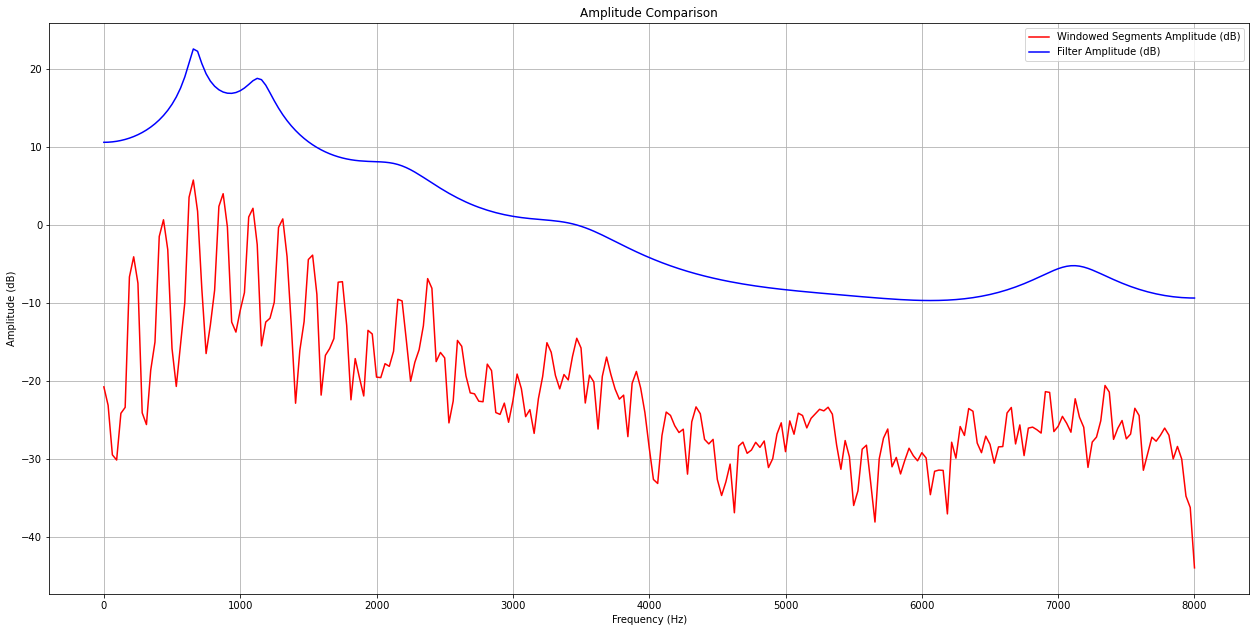

In [184]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(freq_axis, fft_voiced_dB, label='Windowed Segments Amplitude (dB)', c='r')
plt.plot(freq_axis, filter_mag_dB_adjusted[:257], label='Filter Amplitude (dB)', c='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Amplitude Comparison')
plt.legend()
plt.grid(True)
plt.show()

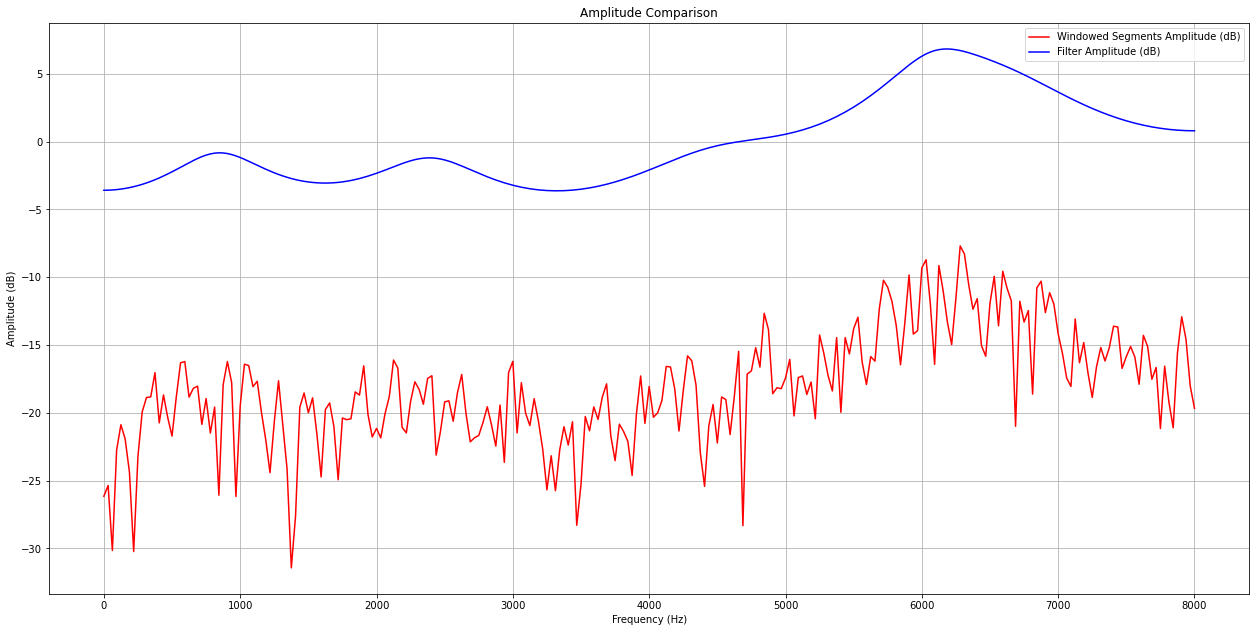

In [182]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(freq_axis_unvoiced, fft_unvoiced_dB, label='Windowed Segments Amplitude (dB)', c='r')
plt.plot(freq_axis_unvoiced, filter_mag_dB_unvoiced_adjusted[:257], label='Filter Amplitude (dB)', c='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Amplitude Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [194]:
# 7.c) note: see previous one

In [195]:
# 8)

# Using M = 2

autocorr_voiced = np.correlate(x1_voiced_hann, x1_voiced_hann, mode='full')
autocorr_voiced = autocorr_voiced[len(x1_voiced_hann)-1:len(x1_voiced_hann)+2]
autocorr_voiced[:-1].shape

(2,)

In [196]:
coefficients_voiced = solve_toeplitz((-1)*autocorr_voiced[:-1], autocorr_voiced[1:])
coefficients_voiced

array([-1.87006618,  0.97277517])

In [198]:
frequency_response_voiced = freqz(b = 1, a = np.concatenate(([1], coefficients_voiced)), worN=frame_length_samples, whole=True, fs=sample_rate)
frequency_response_voiced

(array([    0.  ,    31.25,    62.5 ,    93.75,   125.  ,   156.25,
          187.5 ,   218.75,   250.  ,   281.25,   312.5 ,   343.75,
          375.  ,   406.25,   437.5 ,   468.75,   500.  ,   531.25,
          562.5 ,   593.75,   625.  ,   656.25,   687.5 ,   718.75,
          750.  ,   781.25,   812.5 ,   843.75,   875.  ,   906.25,
          937.5 ,   968.75,  1000.  ,  1031.25,  1062.5 ,  1093.75,
         1125.  ,  1156.25,  1187.5 ,  1218.75,  1250.  ,  1281.25,
         1312.5 ,  1343.75,  1375.  ,  1406.25,  1437.5 ,  1468.75,
         1500.  ,  1531.25,  1562.5 ,  1593.75,  1625.  ,  1656.25,
         1687.5 ,  1718.75,  1750.  ,  1781.25,  1812.5 ,  1843.75,
         1875.  ,  1906.25,  1937.5 ,  1968.75,  2000.  ,  2031.25,
         2062.5 ,  2093.75,  2125.  ,  2156.25,  2187.5 ,  2218.75,
         2250.  ,  2281.25,  2312.5 ,  2343.75,  2375.  ,  2406.25,
         2437.5 ,  2468.75,  2500.  ,  2531.25,  2562.5 ,  2593.75,
         2625.  ,  2656.25,  2687.5 ,  2718.75, 

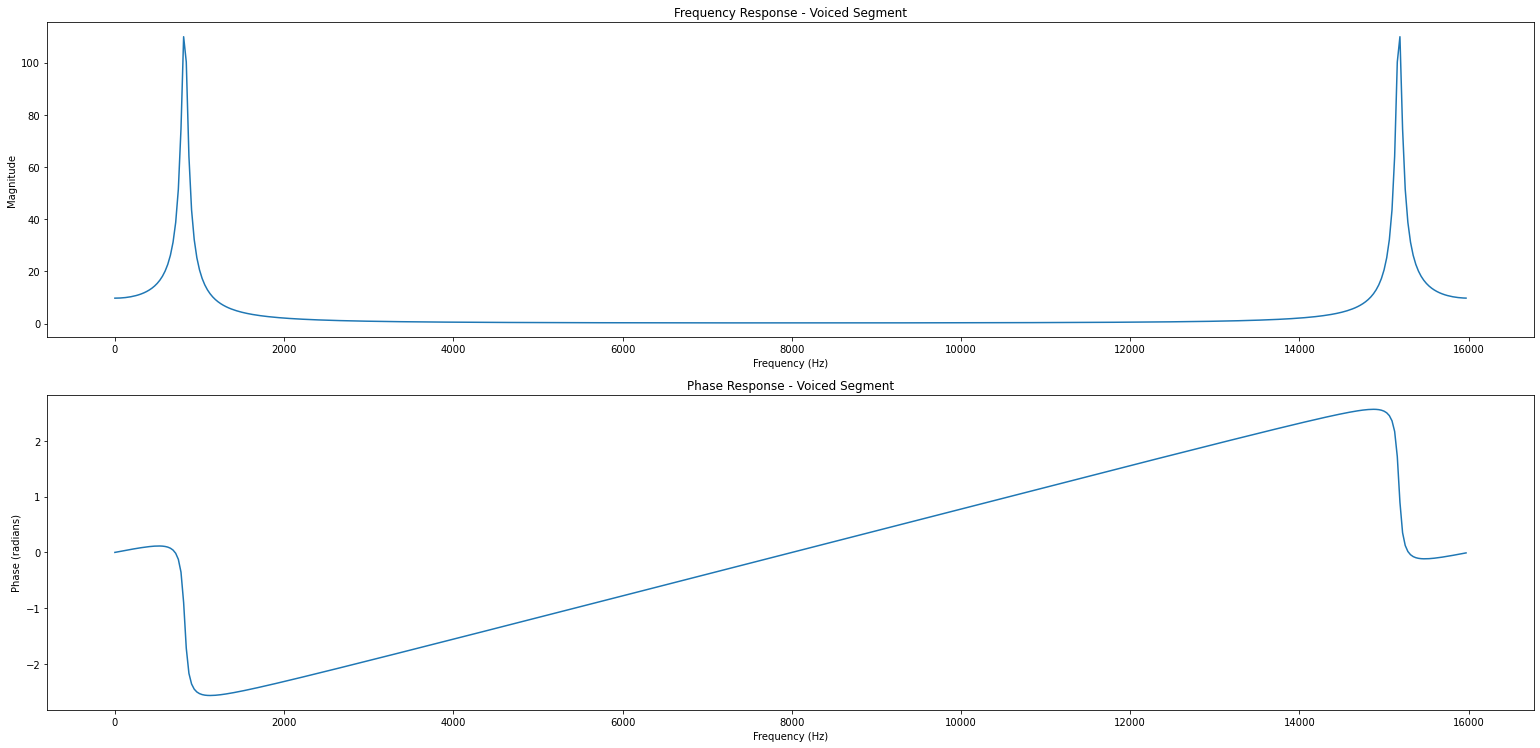

In [199]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.subplot(2, 1, 1)
plt.plot(frequency_response_voiced[0], np.abs(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response - Voiced Segment')

plt.subplot(2, 1, 2)
plt.plot(frequency_response_voiced[0], np.angle(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response - Voiced Segment')

plt.tight_layout()
plt.show()

In [200]:
# Using M = 20

autocorr_voiced = np.correlate(x1_voiced_hann, x1_voiced_hann, mode='full')
autocorr_voiced = autocorr_voiced[len(x1_voiced_hann)-1:len(x1_voiced_hann)+20]
autocorr_voiced[:-1].shape

(20,)

In [201]:
coefficients_voiced = solve_toeplitz((-1)*autocorr_voiced[:-1], autocorr_voiced[1:])
coefficients_voiced

array([-2.74571201,  2.58582231, -0.16929067, -1.53978692,  1.13209779,
        0.27618821, -1.0422879 ,  0.85053372, -0.65476122,  0.93139295,
       -0.71217332, -0.40572221,  0.99476259, -0.17280217, -0.81755147,
        1.07716181, -0.64249662, -0.11967656,  0.42775987, -0.17141937])

In [202]:
frequency_response_voiced = freqz(b = 1, a = np.concatenate(([1], coefficients_voiced)), worN=frame_length_samples, whole=True, fs=sample_rate)
frequency_response_voiced

(array([    0.  ,    31.25,    62.5 ,    93.75,   125.  ,   156.25,
          187.5 ,   218.75,   250.  ,   281.25,   312.5 ,   343.75,
          375.  ,   406.25,   437.5 ,   468.75,   500.  ,   531.25,
          562.5 ,   593.75,   625.  ,   656.25,   687.5 ,   718.75,
          750.  ,   781.25,   812.5 ,   843.75,   875.  ,   906.25,
          937.5 ,   968.75,  1000.  ,  1031.25,  1062.5 ,  1093.75,
         1125.  ,  1156.25,  1187.5 ,  1218.75,  1250.  ,  1281.25,
         1312.5 ,  1343.75,  1375.  ,  1406.25,  1437.5 ,  1468.75,
         1500.  ,  1531.25,  1562.5 ,  1593.75,  1625.  ,  1656.25,
         1687.5 ,  1718.75,  1750.  ,  1781.25,  1812.5 ,  1843.75,
         1875.  ,  1906.25,  1937.5 ,  1968.75,  2000.  ,  2031.25,
         2062.5 ,  2093.75,  2125.  ,  2156.25,  2187.5 ,  2218.75,
         2250.  ,  2281.25,  2312.5 ,  2343.75,  2375.  ,  2406.25,
         2437.5 ,  2468.75,  2500.  ,  2531.25,  2562.5 ,  2593.75,
         2625.  ,  2656.25,  2687.5 ,  2718.75, 

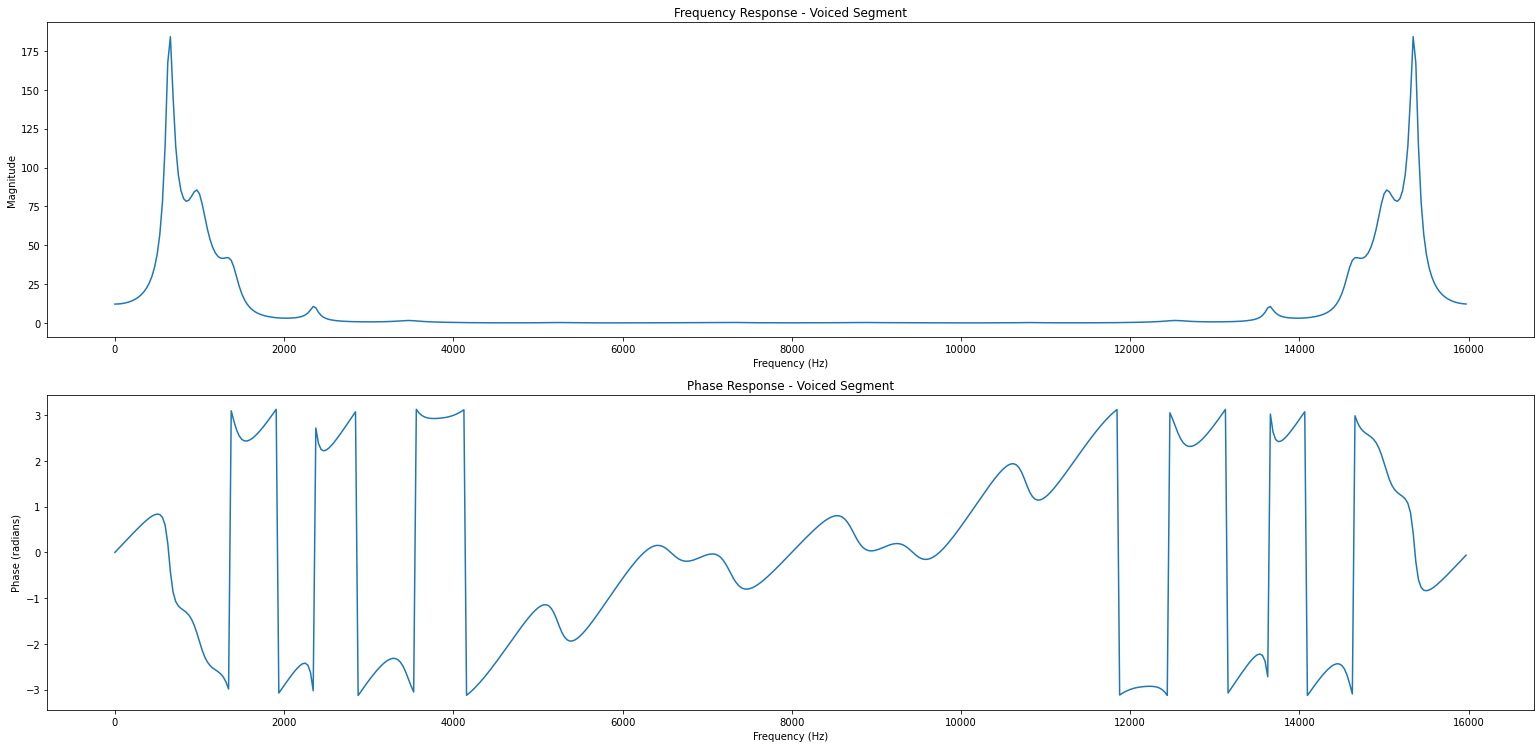

In [203]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.subplot(2, 1, 1)
plt.plot(frequency_response_voiced[0], np.abs(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response - Voiced Segment')

plt.subplot(2, 1, 2)
plt.plot(frequency_response_voiced[0], np.angle(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response - Voiced Segment')

plt.tight_layout()
plt.show()

We can observe that if we reduce the number of coefficients the frequency response is less accurate. while if we add more coefficients the frequency response is more accurate and detailed. This is because the more coefficients we take into consideration the more information from previous samples are taken into consideration, which improves the estimate of the filter.

In [215]:
# 9.a)
import scipy.signal as signal
import librosa
alpha = 0.95
pre_emphasized_segment = signal.lfilter([1, -alpha], 1, speech1_data_voiced)
order = 12  # desired order of the LP analysis
lp_coefficients = librosa.lpc(pre_emphasized_segment, order)
lp_coefficients

C:\Users\aonti\AppData\Local\Temp/ipykernel_19920/4145630318.py:6: FutureWarning: Pass order=12 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  lp_coefficients = librosa.lpc(pre_emphasized_segment, order)


array([ 1.        , -1.7933582 ,  0.8329111 ,  0.63443931, -0.79161087,
        0.04114029,  0.64266378, -0.52924584,  0.05427863,  0.19895684,
        0.07314363, -0.34009358,  0.2344948 ])

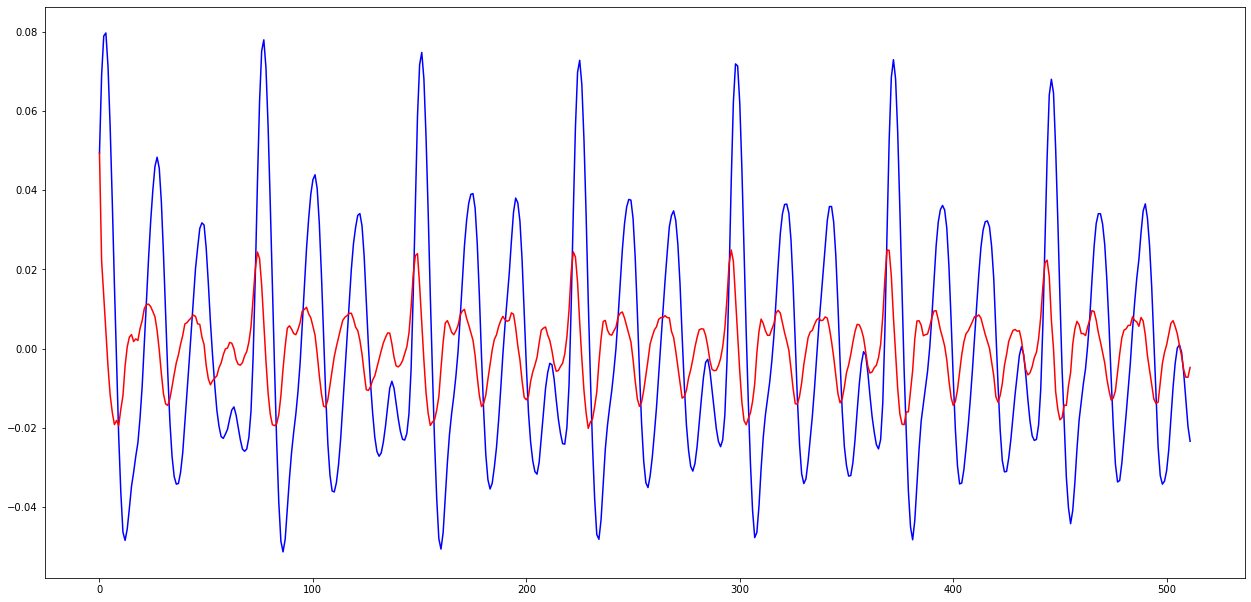

In [217]:
fig, ax = plt.subplots()
fig.set_size_inches(21.5, 10.5)
ax.plot(speech1_data_voiced, c='b')
ax.plot(pre_emphasized_segment, c='r')

9.b) The advantage of pre-emphasizing the speech signal is that this process boosts the higher frequency range in the signal, which is typically more susceptible to noise due to higher frequencies carrying less energy than lower frequencies in speech signals. By pre-emphasizing we improve the signal-to-noise ratio.